In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv")#.sort_values(by="event")
price_matrix = pd.read_csv("price_matrix.csv").reset_index().rename(columns={"index": "run_id"})
# random_search_log = pd.read_csv("random_search_log.csv")

# cummulative max fitness
# random_search_log['max_fitness'] = random_search_log.fitness.cummax()

In [3]:
sns.set_style("whitegrid")

In [12]:
t = np.linspace(0, 100, 1000)
wtp = np.ones_like(t) * 500
period = 20
amp = 0.2
time_factor = amp * np.sin((2.0 * np.pi * t / period))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Willingness to Pay (WTP) over Time')
ax.set_xlabel('Time')
ax.set_ylabel('WTP')
sns.lineplot(x=t, y=wtp * (1+time_factor), label='WTP')
sns.lineplot(x=t, y=(wtp * (1+time_factor))-5, label='WTP-')
ax.hlines(y=500, xmin=0, xmax=100, color='red', linestyle='--', label='Constant (mean)')
ax.hlines(y=400, xmin=0, xmax=100, color='blue', linestyle='--', label='Constant (low)')
ax.hlines(y=600, xmin=0, xmax=100, color='green', linestyle='--', label='Constant (high)')
ax.legend()

In [ ]:
wtp = 500
prices = np.array(list(range(0, 700)))
sub_wtp = np.array(list(range(0, 500)))
profit = prices
# profit[:500] = sub_wtp
rel_diff = (wtp - prices) / wtp

scales = [5,10,15,20,100]
# sns.lineplot(x=prices, y=profit)
# sns.lineplot(x=prices, y=rel_diff)

fig, ax = plt.subplots()

ax.vlines(x=wtp, ymin=0, ymax=500, color='red', linestyle='--')
ax.set_ylabel('Profit')
ax.set_xlabel('Price')

for scale in scales:
    purchase_prob = 1 / (1+ np.exp(-rel_diff*scale))
    sns.lineplot(x=prices, y=profit*purchase_prob)

In [101]:
num_customers = event_history.customer.max() + 1

event_history['welfare'] = 0
event_history.loc[event_history.event == 'sold', 'welfare'] = event_history['customer_wtp'] - event_history['price']
event_history['profit'] = 0
event_history.loc[event_history.event == 'sold', 'profit'] = event_history['price']

## ES performance population and offspring

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.scatterplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["run_id"] == 0],
    hue="type",
    ax=axs[0],
)

sns.lineplot(
    x="evaluation",
    y="max_fitness",
    data=random_search_log,
    ax=axs[1],
)

# ax.legend()
axs[0].set_ylabel("$f(x)$")
axs[0].grid(axis="x")
axs[1].grid(axis="x")
axs[0].set_xlabel("Number of Evaluations")
axs[1].set_xlabel("Number of Evaluations")

axs[1].set_ylabel("Mutation Strength $\sigma_t$")
plt.show()

### rechenberg vs none

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

res = evolution_log.groupby(["n_evals", "mutation_strat", "run_id"]).agg(
    {"avg_regret": "mean"}
).reset_index()

sns.lineplot(x="n_evals", y="avg_regret", data=res, hue="mutation_strat", ax=ax)

ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
ax.set_xlabel("Number of Evaluations")

# Price Matrix

In [43]:
pm = price_matrix.loc[(price_matrix.visit == 0)
                       & (price_matrix.t < 10) & (price_matrix.group == 1)]

<Axes: xlabel='t', ylabel='price'>

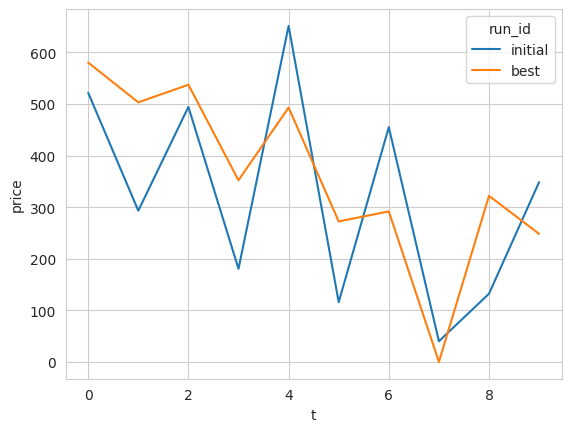

In [44]:
sns.lineplot(
    data=pm,
    x="t",
    y="price",
    hue="run_id",
)

In [11]:
pm

,run_id,type,group,visit,t,price
1300,initial,0,1,0,0,170.599185
1301,initial,0,1,0,1,399.832796
1302,initial,0,1,0,2,504.066673
1303,initial,0,1,0,3,642.716836
1304,initial,0,1,0,4,498.413647
1305,initial,0,1,0,5,362.483654
1306,initial,0,1,0,6,126.304598
1307,initial,0,1,0,7,260.006547
1308,initial,0,1,0,8,456.842210
1309,initial,0,1,0,9,157.962001


<Axes: xlabel='t', ylabel='price'>

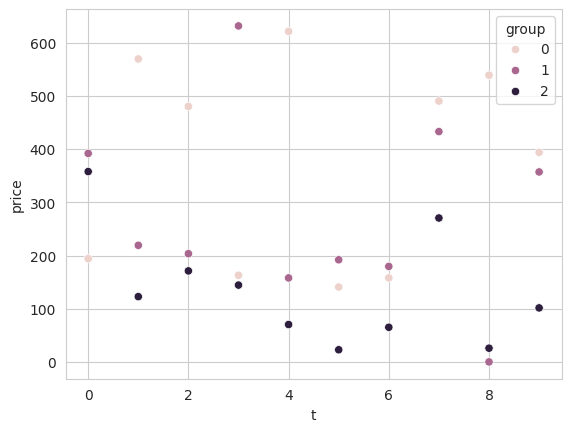

In [31]:
sns.scatterplot(data=price_matrix.loc[
    (price_matrix.t < 10) & 
    (price_matrix.visit == 0) & (price_matrix.run_id == 0)], x='t', hue='group', y='price')

In [16]:
price_matrix

,group,visit,t,price
0,2,5,0,466.349109
0,2,5,1,139.537661
0,2,5,2,214.571136
0,2,5,3,524.181869
0,2,5,4,8.532107
...,...,...,...,...
1,2,8,95,456.957300
1,2,8,96,377.980619
1,2,8,97,81.225434
1,2,8,98,582.566925


In [ ]:
sns.heatmap(price_matrix.head(30).pivot(index="group", columns="visit", values="price"))

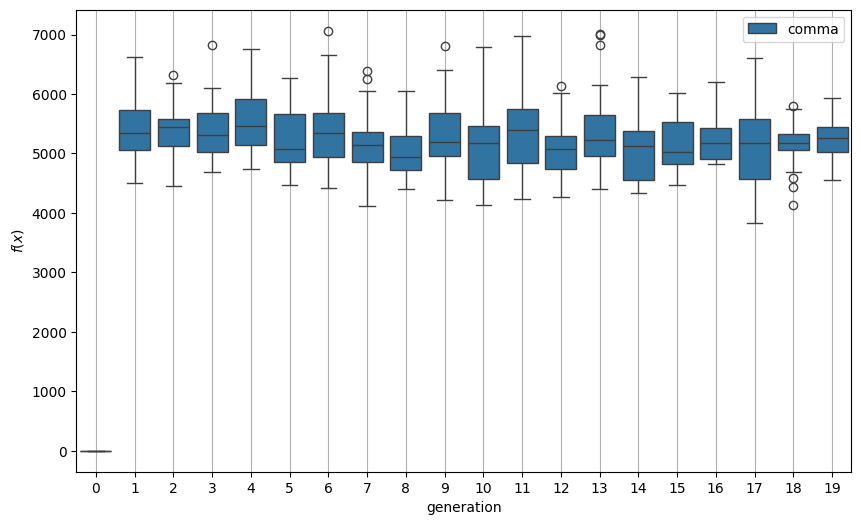

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x="generation",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="selection",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

## Steady State ES

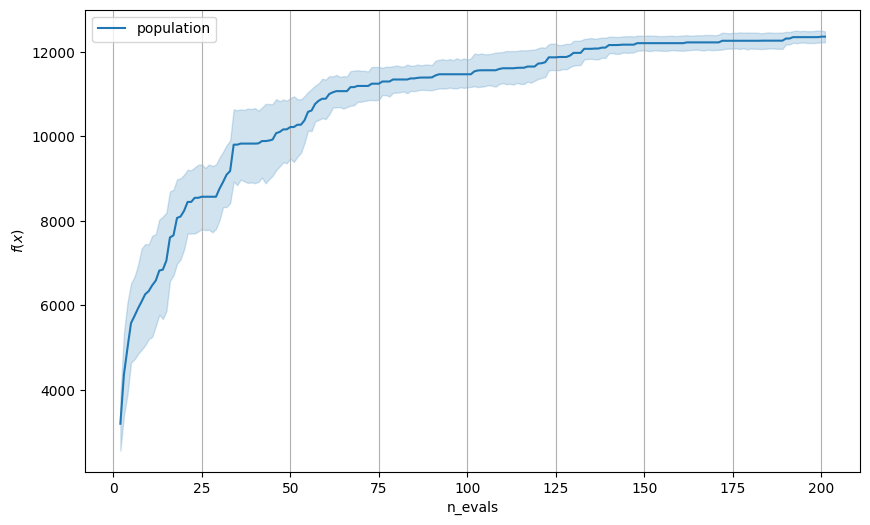

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

<Axes: xlabel='n_evals', ylabel='mutation_strength'>

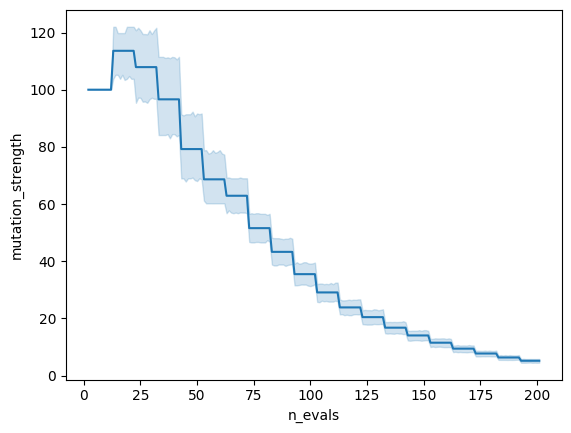

In [ ]:
sns.lineplot(
    x="n_evals",
    y="mutation_strength",
    data=evolution_log.loc[evolution_log["type"] == "population"],
)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.scatterplot(
    x="n_evals",
    y="score",
    data=evolution_log,
    hue="run_id",
    ax=axs[0],
)

# ax.legend()
axs[0].set_ylabel("$f(x)$")
axs[0].grid(axis="x")
axs[1].grid(axis="x")
axs[0].set_xlabel("Number of Evaluations")
axs[1].set_xlabel("Number of Evaluations")

axs[1].set_ylabel("Mutation Strength $\sigma_t$")
plt.show()

In [29]:
price_matrix

,run_id,group,visit,t,price
0,0,2,5,0,466.349109
1,0,2,5,1,139.537661
2,0,2,5,2,214.571136
3,0,2,5,3,524.181869
4,0,2,5,4,8.532107
...,...,...,...,...,...
5995,1,2,8,95,456.957300
5996,1,2,8,96,377.980619
5997,1,2,8,97,81.225434
5998,1,2,8,98,582.566925
